   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

/var/folders/2k/wtj70sj51qj170g6ky83xbh00000gn/T/ipykernel_1340/365657019.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/hudasaeed/Downloads/diabetic_data.csv",na_values = ["?","Unknown/Invalid"])


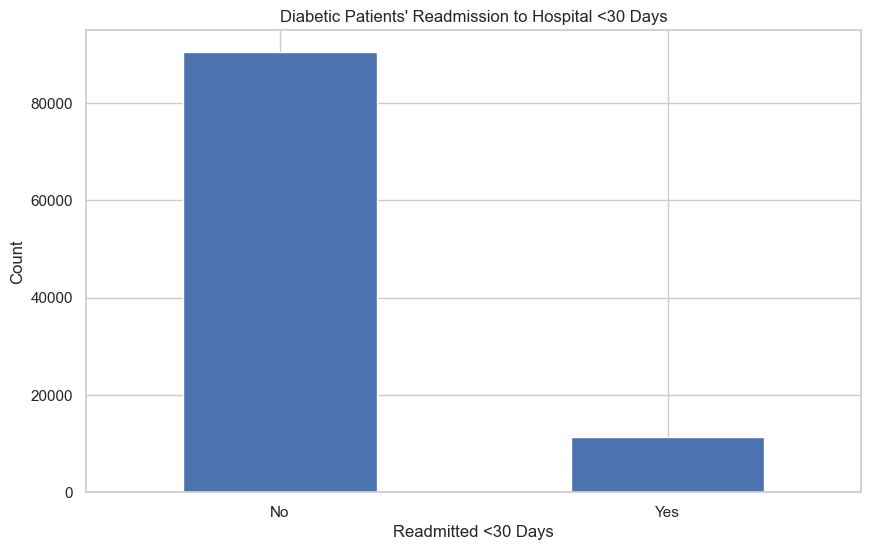

(99343, 51)


In [166]:
#read data
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv("/Users/hudasaeed/Downloads/diabetic_data.csv",na_values = ["?","Unknown/Invalid"])

#explore
print(df.head())
print(df.shape) #101,766 rows, 50 columns
print(df.dtypes)

#create + explore target
df['Y'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
print(df['Y'].value_counts())

plt.figure(figsize=(10,6))
pd.value_counts(df['Y']).plot.bar()
ax = plt.gca() #get axis
ax.set_xticklabels(['No','Yes'])
plt.xticks(rotation=0)  
plt.xlabel('Readmitted <30 Days')
plt.ylabel('Count')
plt.title('Diabetic Patients\' Readmission to Hospital <30 Days')
plt.show() #imbalanced data

#filter data
df = df[~df['discharge_disposition_id'].isin([11,13,14,19,20,21])] #remove patients who passed/in hospice since cannot be readmitted
print(df.shape) #99,343 rows, 51 columns

In [167]:
#explore features

#patients
patient = df['patient_nbr'].value_counts()
print(patient[patient>1]) #16,341 patients repeat - group structure

#race
print(df['race'].value_counts())

#gender
print(df['gender'].value_counts())

#age
print(df['age'].value_counts())

#weight
print(df['weight'].value_counts())

#admission
df['admission_type_id'] = df['admission_type_id'].replace([5,6], 'NA') #from variable def
print(df['admission_type_id'].value_counts())

#discharge
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace([18,26], 'NA') #from variable def
print(df['discharge_disposition_id'].value_counts())

#admission source
df['admission_source_id'] = df['admission_source_id'].replace([9,15,17,21], 'NA') #from variable def
print(df['admission_source_id'].value_counts())

#time 
print(df['time_in_hospital'].value_counts())

#payer_code 
print(df['payer_code'].value_counts())

#medical_specialty 
pd.set_option('display.max_rows', 200)
df['admission_source_id'] = df['admission_source_id'].replace('PhysicianNotFound', 'NA') #from variable def
print(df['medical_specialty'].value_counts())

#labs 
print(df['num_lab_procedures'].describe())

#non lab procedures 
print(df['num_procedures'].describe())

#med 
print(df['num_medications'].describe())

#Number of outpatient visits of the patient in the year preceding 
print(df['number_outpatient'].describe())

#Number of emergency visits of the patient in the year preceding  
print(df['number_emergency'].describe())

#ICD 9 code
print(df['diag_1'].value_counts())
print(df['diag_2'].value_counts())
print(df['diag_3'].value_counts())

#diagnoses 
print(df['number_diagnoses'].describe())

#glucose
df['max_glu_serum'] = df['max_glu_serum'].fillna('No test') #from variable def
print(df['max_glu_serum'].value_counts())

#A1C
df['A1Cresult'] = df['A1Cresult'].fillna('No test') #from variable def
print(df['A1Cresult'].value_counts())

#metformin
print(df['metformin'].value_counts())

#repaglinide
print(df['repaglinide'].value_counts())

#nateglinide
print(df['nateglinide'].value_counts())

#chlorpropamide
print(df['chlorpropamide'].value_counts())

#glimepiride
print(df['glimepiride'].value_counts())

#acetohexamide
print(df['acetohexamide'].value_counts()) #rare

#glipizide
print(df['glipizide'].value_counts())

#glyburide
print(df['glyburide'].value_counts())

#tolbutamide
print(df['tolbutamide'].value_counts()) #rare

#pioglitazone
print(df['pioglitazone'].value_counts()) 

#rosiglitazone
print(df['rosiglitazone'].value_counts()) 

#acarbose
print(df['acarbose'].value_counts())

#miglitol
print(df['miglitol'].value_counts())

#troglitazone
print(df['troglitazone'].value_counts()) #rare - pulled in 2000 bc associated w liver failure

#tolazamide
print(df['tolazamide'].value_counts()) 

#examide
print(df['examide'].value_counts()) #no one takes this

#citoglipton
print(df['citoglipton'].value_counts()) #no one takes this

#insulin
print(df['insulin'].value_counts()) #most use

#glyburide-metformin
print(df['glyburide-metformin'].value_counts()) 

#glipizide-metformin
print(df['glipizide-metformin'].value_counts()) 

#glimepiride-pioglitazone
print(df['glimepiride-pioglitazone'].value_counts()) #rare

#metformin-rosiglitazone
print(df['metformin-rosiglitazone'].value_counts()) #rare

#metformin-pioglitazone
print(df['metformin-pioglitazone'].value_counts()) #rare

#change in diabetes med
print(df['change'].value_counts()) #about 50-50

#new diabetes med
print(df['diabetesMed'].value_counts()) 

#missing data
miss_ft = df.isnull().sum(axis=0)/df.shape[0]
imp_ft = miss_ft[miss_ft > 0]
print(imp_ft) #% of missing points for each feature with missing values 

miss_rows = df.isnull().sum(axis=1)/df.shape[0]
imp_rows = miss_rows[miss_rows>0]
print(len(imp_rows)/df.shape[0]) #% of rows with missing values - 99%

patient_nbr
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
41077755      2
84610026      2
130257        2
55733985      2
112743072     2
Name: count, Length: 16341, dtype: int64
race
Caucasian          74220
AfricanAmerican    18772
Hispanic            2017
Other               1472
Asian                628
Name: count, dtype: int64
gender
Female    53454
Male      45886
Name: count, dtype: int64
age
[70-80)     25331
[60-70)     22059
[50-60)     17060
[80-90)     16434
[40-50)      9607
[30-40)      3764
[90-100)     2589
[20-30)      1649
[10-20)       690
[0-10)        160
Name: count, dtype: int64
weight
[75-100)     1312
[50-75)       867
[100-125)     617
[125-150)     143
[25-50)        90
[0-25)         48
[150-175)      34
[175-200)      11
>200            3
Name: count, dtype: int64
admission_type_id
1     52371
3     18668
2     18132
NA     9824
8       320
7        18
4        10
Name: count, dtype: int64
discharge_disposi

Y                    0     1
race                        
AfricanAmerican  16623  2149
Asian              563    65
Caucasian        65664  8556
Hispanic          1805   212
Other             1328   144


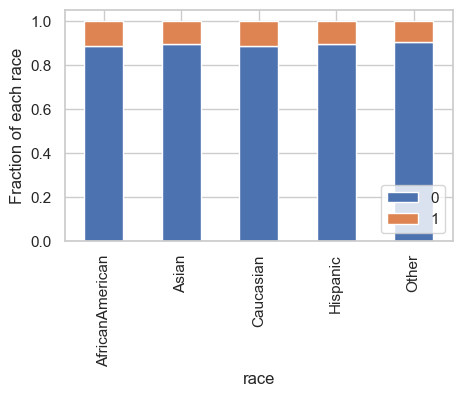

gender  Female   Male
Y                    
0        47326  40700
1         6128   5186


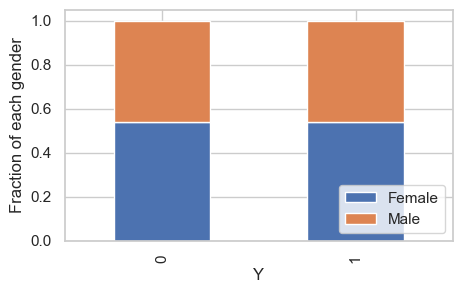

Y             0     1
age                  
[0-10)      157     3
[10-20)     650    40
[20-30)    1413   236
[30-40)    3340   424
[40-50)    8583  1024
[50-60)   15393  1667
[60-70)   19566  2493
[70-80)   22277  3054
[80-90)   14369  2065
[90-100)   2281   308


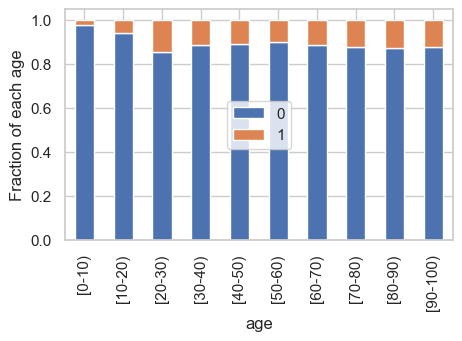

admission_type_id        1        2        3    4     7      8      NA
Y                                                                     
0                  46177.0  16074.0  16710.0  9.0  18.0  293.0  8748.0
1                   6194.0   2058.0   1958.0  1.0   NaN   27.0  1076.0


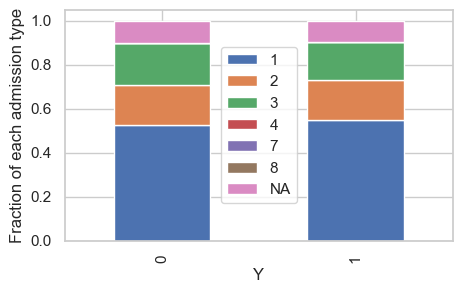

Y                               0       1
discharge_disposition_id                 
1                         54632.0  5602.0
2                          1786.0   342.0
3                         11908.0  2046.0
4                           711.0   104.0
5                           937.0   247.0
6                         11264.0  1638.0
7                           533.0    90.0
8                            93.0    15.0
9                            12.0     9.0
10                            6.0     NaN
12                            1.0     2.0
15                           35.0    28.0
16                           11.0     NaN
17                           14.0     NaN
22                         1441.0   552.0
23                          382.0    30.0
24                           41.0     7.0
25                          897.0    92.0
27                            5.0     NaN
28                           88.0    51.0
NA                         3232.0   459.0


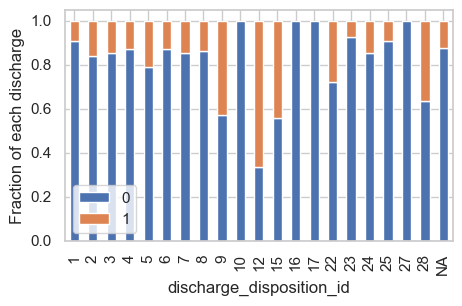

Y                          0       1
admission_source_id                 
1                    26048.0  3120.0
2                      970.0   111.0
3                      156.0    29.0
4                     2809.0   309.0
5                      706.0   100.0
6                     2027.0   212.0
7                    49160.0  6690.0
8                       13.0     2.0
10                       8.0     NaN
11                       2.0     NaN
13                       1.0     NaN
14                       2.0     NaN
20                     137.0    22.0
22                      10.0     2.0
25                       2.0     NaN
NA                    5978.0   717.0


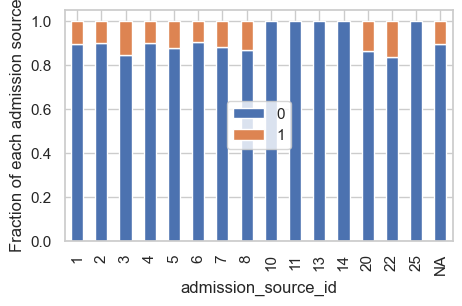

Y              0     1
A1Cresult             
>7          3392   383
>8          7328   809
No test    72868  9641
Norm        4441   481


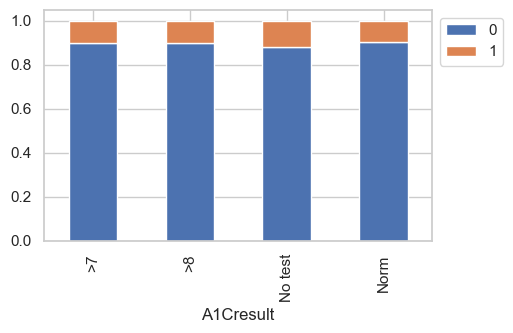

insulin   Down     No  Steady    Up
Y                                  
0        10215  41643   26649  9522
1         1693   4736    3420  1465


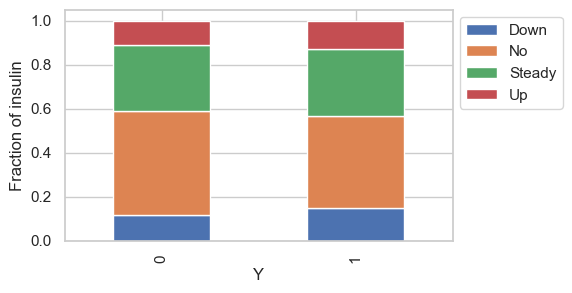

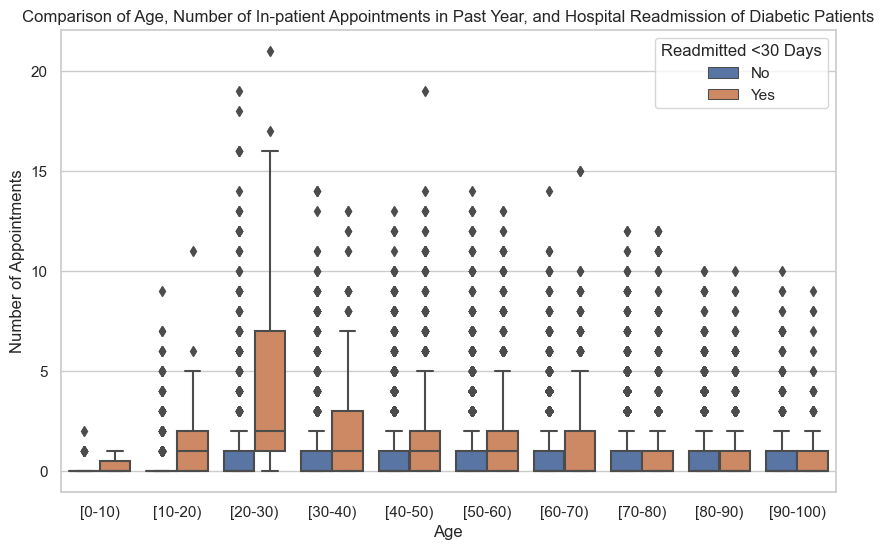

Y                           0     1
race            gender             
AfricanAmerican Female  10168  1295
                Male     6455   854
Asian           Female    292    24
                Male      271    41
Caucasian       Female  34196  4541
                Male    31468  4015
Hispanic        Female    986   100
                Male      819   112
Other           Female    657    77
                Male      670    67


<Figure size 1000x500 with 0 Axes>

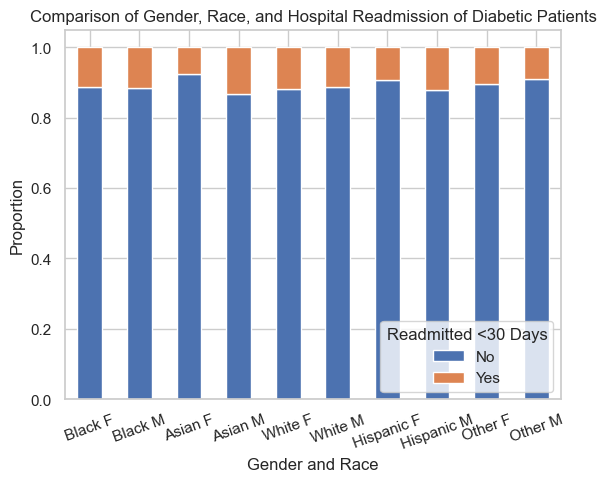

Y                              0         1
race            gender                    
AfricanAmerican Female  0.887028  0.112972
                Male    0.883158  0.116842
Asian           Female  0.924051  0.075949
                Male    0.868590  0.131410
Caucasian       Female  0.882774  0.117226
                Male    0.886847  0.113153
Hispanic        Female  0.907919  0.092081
                Male    0.879699  0.120301
Other           Female  0.895095  0.104905
                Male    0.909091  0.090909


In [171]:
#explore target with other features

count_matrix = df.groupby(['race', 'Y']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction of each race')
plt.legend(loc=4)
plt.show()

count_matrix = df.groupby(['Y', 'gender']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction of each gender')
plt.legend(loc=4)
plt.show()

count_matrix = df.groupby(['age', 'Y']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction of each age')
plt.legend(loc=10)
plt.show()

count_matrix = df.groupby(['Y', 'admission_type_id']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction of each admission type')
plt.legend(loc=10)
plt.show()

count_matrix = df.groupby(['discharge_disposition_id', 'Y']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction of each discharge')
plt.legend(loc=3)
plt.show()

count_matrix = df.groupby(['admission_source_id', 'Y']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction of each admission source')
plt.legend(loc=10)
plt.show()

count_matrix = df.groupby(['A1Cresult', 'Y']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

count_matrix = df.groupby(['Y', 'insulin']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,3))
plt.ylabel('Fraction of insulin')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

import seaborn as sns

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='number_inpatient', hue='Y', data=df)
plt.title('Comparison of Age, Number of In-patient Appointments in Past Year, and Hospital Readmission of Diabetic Patients')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
legend = plt.legend(title='Readmitted <30 Days', loc='upper right')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.show()

pivot_table = df.pivot_table(index=['race', 'gender'], columns='Y', aggfunc='size', fill_value=0)
print(pivot_table)
# Calculate relative proportions
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Create a grouped bar chart
plt.figure(figsize=(10, 5))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Comparison of Gender, Race, and Hospital Readmission of Diabetic Patients')
plt.xlabel('Gender and Race')
plt.ylabel('Proportion')
labels = ['Black F','Black M','Asian F','Asian M','White F','White M','Hispanic F','Hispanic M',\
           'Other F','Other M']
# Customize the legend
legend = plt.legend(title='Readmitted <30 Days', loc='lower right')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.xticks(range(10), labels, rotation=20)
plt.show()
print(pivot_table)

In [132]:
#recategorize specialty and ICD9 codes

def map_icd9_to_category(icd9):
    if pd.isnull(icd9): 
        return 'NA'
    if str(icd9)[0].isdigit() == False:
        if str(icd9)[0] == 'V':
            return 'Factors influencing Health Status and Contact with Health Services'
        elif str(icd9)[0] == 'E':
            return 'External Causes of Injury and Poisoning'
        elif str(icd9)[0] == 'M':
            return 'Morphology of Neoplasms'
    else:
        code_int = int(str(icd9)[:3])
        if 1 <= code_int <= 139:
            return 'Infectious/Parasitic'
        elif 140 <= code_int <= 239:
            return 'Neoplasms'
        elif 240 <= code_int <= 279:
            return 'Endocrine/Nutritional/Metabolic/Immunity'
        elif 280 <= code_int <= 289:
            return 'Blood'
        elif 290 <= code_int <= 319:
            return 'Mental'
        elif 320 <= code_int <= 389:
            return 'Nervous System/Sense Organs'
        elif 390 <= code_int <= 459:
            return 'Circulatory'
        elif 460 <= code_int <= 519:
            return 'Respiratory'
        elif 520 <= code_int <= 579:
            return 'Digestive'
        elif 580 <= code_int <= 629:
            return 'Genitourinary'
        elif 630 <= code_int <= 679:
            return 'Pregnancy/Childbirth/Puerperium'
        elif 680 <= code_int <= 709:
            return 'Skin'
        elif 710 <= code_int <= 739:
            return 'Musculoskeletal'
        elif 740 <= code_int <= 759:
            return 'Congenital Anomalies'
        elif 760 <= code_int <= 779:
            return 'Perinatal'
        elif 780 <= code_int <= 799:
            return 'Symptoms/Ill-defined Conditions'
        elif 800 <= code_int <= 999:
            return 'Injury/Poisoning'
        else:
            return 'Other-dig'

df['new_diag1'] = df['diag_1'].apply(lambda x: map_icd9_to_category(x))
df['new_diag2'] = df['diag_2'].apply(lambda x: map_icd9_to_category(x))
df['new_diag3'] = df['diag_3'].apply(lambda x: map_icd9_to_category(x))
print(df['new_diag1'].value_counts())
print(df['new_diag2'].value_counts())
print(df['new_diag3'].value_counts())

def map_spec_to_category(spec):
    if pd.isnull(spec):
        return 'NA'
    spec = str(spec)

    if 'Surg' in spec:
        return 'Surgery'
    elif 'Pediatric' in spec:
        return 'Pediatric'
    elif 'Emerg' in spec:
        return 'Emergency/Trauma'
    elif 'Family' in spec:
        return 'Family/GeneralPractice '
    elif 'Cardio' in spec:
        return 'Cardiology'
    elif 'Internal' in spec or 'Pulmonology' in spec:
        return 'Internal'
    elif 'Nephrology' in spec:
        return 'Nephrology'
    elif 'Orthopedics' in spec:
        return 'Orthopedics'
    elif 'Radio' in spec:
        return 'Radiology'
    elif 'Psychiatry' in spec:
        return 'Psychiatry'
    elif 'Urology' in spec:
        return 'Urology'
    elif 'Gyn' in spec or 'Obstetrics' in spec:
        return 'OBGYN'
    elif 'Gastroenterology' in spec:
        return 'Gastroenterology'
    elif 'PhysicalMedicineandRehabilitation' in spec:
        return 'PhysicalMedicineandRehabilitation'
    elif 'Oncology' in spec or 'Hematology' in spec:
        return 'Hematology/Oncology'
    elif 'Neuro' in spec:
        return 'Neurology'
    elif 'Otolaryngology' in spec:
        return 'Otolaryngology'
    elif 'Endocrinology' in spec:
        return 'Endocrinology'
    elif 'Psychology' in spec:
        return 'Psychology'
    elif 'Podiatry' in spec:
        return 'Podiatry'
    elif 'Hospitalist' in spec:
        return 'Hospitalist'
    elif 'Ophthalmology' in spec:
        return 'Ophthalmology'
    elif 'Osteopath' in spec:
        return 'Osteopath'
    elif 'Pathology' in spec or 'InfectiousDiseases' in spec:
        return 'Pathology'
    elif 'OutreachServices' in spec:
        return 'OutreachServices'
    elif 'Anesthesiology' in spec:
        return 'Anesthesiology'
    elif 'AllergyandImmunology' in spec:
        return 'AllergyandImmunology'
    elif 'DCPTEAM' in spec:
        return 'DCPTEAM'
    elif 'Rheumatology' in spec:
        return 'Rheumatology'
    elif 'Dentistry' in spec:
        return 'Dentistry'
    elif 'Speech' in spec:
        return 'Speech'
    elif 'SportsMedicine' in spec:
        return 'SportsMedicine'
    elif 'Dermatology' in spec:
        return 'Dermatology'
    elif 'Proctology' in spec:
        return 'Proctology'
    elif 'Perinatology' in spec:
        return 'Perinatology'

df['new_spec'] = df['medical_specialty'].apply(lambda x: map_spec_to_category(x))
print(df['new_spec'].value_counts())
print(df['medical_specialty'].value_counts())
print(df['diag_1'].isna().sum())
print(df['diag_2'].isna().sum())
print(df['diag_3'].isna().sum())

new_diag1
Circulatory                                                           29585
Endocrine/Nutritional/Metabolic/Immunity                              11304
Respiratory                                                            9919
Digestive                                                              9072
Symptoms/Ill-defined Conditions                                        7601
Injury/Poisoning                                                       6853
Genitourinary                                                          4963
Musculoskeletal                                                        4935
Neoplasms                                                              3131
Infectious/Parasitic                                                   2553
Skin                                                                   2508
Mental                                                                 2256
Factors influencing Health Status and Contact with Health Services     1632
Ne

In [133]:
#make age numeric
# def age_num(age):
#     if age=='[0-10)':
#         return 5
#     elif age=='[10-20)':
#         return 15
#     elif age=='[20-30)':
#         return 25
#     elif age=='[30-40)':
#         return 35
#     elif age=='[40-50)':
#         return 45
#     elif age=='[50-60)':
#         return 55
#     elif age=='[60-70)':
#         return 65
#     elif age=='[70-80)':
#         return 75
#     elif age=='[80-90)':
#         return 85
#     elif age=='[90-100)':
#         return 95

# df['age_num'] = df['age'].apply(lambda x: age_num(x))
# print(df['age_num'].value_counts())
# print(df['age'].value_counts())

In [134]:
#fix data types before splitting
for column in df.columns:
    data_types = df[column].apply(type).unique()
    if len(data_types) > 1:
        print(f"Column '{column}' has mixed data types: {data_types}")
df['race'] = df['race'].astype(str)
df['gender'] = df['gender'].astype(str)
df['weight'] = df['weight'].astype(str)
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df['payer_code'] = df['payer_code'].astype(str)
df['new_diag1'] = df['new_diag1'].astype(str)
df['new_diag2'] = df['new_diag2'].astype(str)
df['new_diag3'] = df['new_diag3'].astype(str)
df['new_spec'] = df['new_spec'].astype(str)
for column in df.columns:
    data_types = df[column].apply(type).unique()
    if len(data_types) > 1:
        print(f"Column '{column}' has mixed data types: {data_types}")

Column 'race' has mixed data types: [<class 'str'> <class 'float'>]
Column 'gender' has mixed data types: [<class 'str'> <class 'float'>]
Column 'weight' has mixed data types: [<class 'float'> <class 'str'>]
Column 'admission_type_id' has mixed data types: [<class 'str'> <class 'int'>]
Column 'discharge_disposition_id' has mixed data types: [<class 'int'> <class 'str'>]
Column 'admission_source_id' has mixed data types: [<class 'int'> <class 'str'>]
Column 'payer_code' has mixed data types: [<class 'float'> <class 'str'>]
Column 'medical_specialty' has mixed data types: [<class 'str'> <class 'float'>]
Column 'diag_1' has mixed data types: [<class 'str'> <class 'float'>]
Column 'diag_2' has mixed data types: [<class 'float'> <class 'str'>]
Column 'diag_3' has mixed data types: [<class 'float'> <class 'str'>]
Column 'new_spec' has mixed data types: [<class 'str'> <class 'NoneType'>]
Column 'medical_specialty' has mixed data types: [<class 'str'> <class 'float'>]
Column 'diag_1' has mixed

In [109]:
#split
from sklearn.model_selection import StratifiedGroupKFold

y = df['Y']
X = df.drop(columns=['Y','encounter_id','examide','citoglipton','readmitted','diag_1','diag_2','diag_3','medical_specialty'])
print(X.columns)
patient = df['patient_nbr']

cv = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=1)
other_i, test_i = next(cv.split(X, y, groups=patient)) #next() ensures you get the first split
X_test = X.iloc[test_i,]
X_other = X.iloc[other_i,]
y_test = y.iloc[test_i,]
y_other = y.iloc[other_i,]

cv2 = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=1)
for train_i, val_i in (cv2.split(X_other, y_other, groups=X_other['patient_nbr'])):
    X_val = X_other.iloc[val_i,]
    X_train = X_other.iloc[train_i,]
    y_val = y_other.iloc[val_i,]
    y_train = y_other.iloc[train_i,]
    print(y_train.value_counts())
    print(y_val.value_counts())
    print(y_test.value_counts())
    print(np.unique(X_train['patient_nbr']))
    print(np.unique(X_val['patient_nbr']))
    print(np.unique(X_test['patient_nbr']))

print(X_test.head().index) 

Index(['patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'new_diag1',
       'new_diag2', 'new_diag3', 'new_spec'],
      dtype='object')
Y
0    63369
1     8153
Name: count, dtype: int64
Y
0    15932
1     2073
Name: count, dtype: int64
Y
0    8728
1    1088
Name: coun

In [114]:
#preprocess
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

ordinal_ftrs = ['age','weight','max_glu_serum','A1Cresult', 'metformin', \
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', \
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', \
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', \
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
       'glimepiride-pioglitazone', 'metformin-rosiglitazone', \
       'metformin-pioglitazone',] 
ordinal_cats = [['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],\
                ['nan','[0-25)','[25-50)','[50-75)','[75-100)','[100-125)','[125-150)','[150-175)','[175-200)','>200'],\
                ['No test','Norm','>200','>300'],
                 ['No test','Norm','>7','>8'],['No','Down','Steady','Up'],['No','Down','Steady','Up'],['No','Down','Steady','Up'],['No','Down','Steady','Up'],['No','Down','Steady','Up'],\
               ['No','Steady'],['No','Down','Steady','Up'],['No','Down','Steady','Up'],['No','Steady'],\
               ['No','Down','Steady','Up'],['No','Down','Steady','Up'],['No','Down','Steady','Up'],['No','Down','Steady','Up'],\
                ['No','Steady'],['No','Steady','Up'],['No','Down','Steady','Up'],['No','Down','Steady','Up'],['No','Steady'],\
                ['No','Steady'],['No','Steady'],['No','Steady']
               ]
onehot_ftrs = ['race','gender','admission_type_id','discharge_disposition_id',\
              'admission_source_id','payer_code','change','diabetesMed','new_spec','new_diag1','new_diag2','new_diag3']
std_ftrs = ['time_in_hospital','num_lab_procedures','num_procedures',\
            'num_medications','number_outpatient','number_emergency','number_inpatient',\
            'number_diagnoses']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('std', StandardScaler(), std_ftrs)]) #use standard scaler

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)


print(X_train.shape) #46 feats
print(X_train_prep.shape) #198 feats
print(X_val_prep.shape) #198 feats
print(X_test_prep.shape) #198 feats

print(X_test_prep[0]) 
print(df.iloc[0,:])

/Users/hudasaeed/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(71676, 46)
(71676, 198)
(17851, 198)
(9816, 198)
[ 0.          0.          1.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          1.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.